In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 2

In [2]:
c0 = []
with open('column_c0.txt') as f:
    for line in f:
       c0.append(np.float(line)) 

In [3]:
c1 = []
with open('column_c1.txt') as f:
    for line in f:
       c1.append(np.float(line)) 

In [20]:
c2 = []
with open('column_c2.txt') as f:
    for line in f:
       c2.append(np.float(line)) 

In [5]:
def richardson(last_col, order_conv):
    new_col = []
    for i in range(1, len(last_col)):
        new_col.append( last_col[i] + (last_col[i] - last_col[i - 1])/(2**order_conv - 1) )

    return new_col

In [6]:
alpha = np.log2(((c1[1] - c1[0])/(c2[0] - c1[1])) + 1)

In [7]:
calculated_c2 = richardson(c1, alpha)

In [8]:
# Checking to make sure alpha gives us the correct values going from c1 -> c2 (up to 15 digits)
np.isclose(np.array(calculated_c2), np.array(c2), atol=1e-16, rtol=1e-15)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [34]:
alpha

3.0000000000153495

In [52]:
c3 = richardson(c2, 3*alpha)

In [53]:
print("%.15f"%c3[-1])

3.141592653589790


In [54]:
print(c2)

[3.141602881806524, 3.141593478636688, 3.141592712667618, 3.141592657551323, 3.141592653846416, 3.141592653606128, 3.141592653590817, 3.141592653589862, 3.14159265358979]


In [55]:
print(c3)

[3.1415934602351814, 3.141592711168657, 3.1415926574434634, 3.1415926538391656, 3.1415926536056578, 3.1415926535907874, 3.14159265358986, 3.14159265358979]


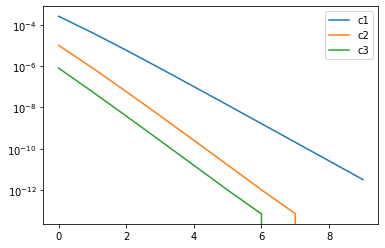

In [56]:
ns = np.array([i for i in range(10)])[1:].astype('float')
true_ans = c2[-1]
plt.plot(np.abs(np.array(c1) - true_ans))
plt.plot(np.abs(np.array(c2) - true_ans))
plt.plot(np.abs(np.array(c3) - true_ans))
plt.legend(['c1', 'c2', 'c3'])
plt.yscale('log')
plt.show()

# Problem 3

In [12]:
f = lambda t, y : 10*y*y

In [65]:
h = 0.25

In [73]:
ts = [0, 0.25, 0.5, 0.75, 1]
ys = [0.1]

In [74]:
for i in range(1, len(ts)):
    ys.append(ys[i - 1] + f(ts[i - 1], ys[i - 1])*h)

In [75]:
true_y = lambda t : -1 / (10*t - 10)

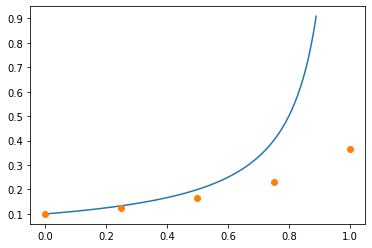

In [76]:
plot_ts = np.arange(0, 0.9, 0.01)
plt.plot(plot_ts, true_y(plot_ts))
plt.plot(ts, ys, 'o')
plt.show()

In [77]:
print(ys)

[0.1, 0.125, 0.1640625, 0.231353759765625, 0.3651651651598513]
